<a href="https://colab.research.google.com/github/NijjohUnno/AmazonExploratoryAnalysis/blob/main/Amazon_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = "/content/drive/MyDrive/Amazon Dataset/Amazon E-Commerce  - Data Table.csv"

amazon = pd.read_csv(data)

#Display the top five rows in the data
amazon.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [ ]:
#Display bottom five rows 
amazon.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
amazon['Total Cost'] = amazon['Quantity'] * amazon['Unit_Cost']
amazon['Total Revenue'] = amazon['Quantity'] * amazon['Unit_Price']
amazon['Profit/Loss'] = amazon['Total Revenue'] - amazon['Total Cost']

In [ ]:
amazon.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Total Cost,Total Revenue,Profit/Loss
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,80.00,109.00,29.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,49.00,57.00,8.00
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,11.01,15.00,3.99
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,175.00,233.00,58.00
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,105.00,125.01,20.01


In [ ]:
#Data Visualization
import seaborn as sns
sns.countplot(x=amazon['Customer'])

NameError: ignored

In [ ]:
#Cleaned the data
amazon.loc[amazon['Customer'] == 'Hign', 'Customer'] = 'High'

In [ ]:
#create a function to group customer age

def age_group(x):
  if x <= 12:
    return "Minor"
  elif x <= 19:
    return "Teenager"
  elif x <= 30:
    return "Youth"
  elif x <= 50:
    return "Adult"
  else:
    return "Elder"

amazon['Customer Age_group'] = amazon['Customer_Age'].apply(age_group)
amazon.head()


,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Total Cost,Total Revenue,Profit/Loss,Customer Age_group
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,80.00,109.00,29.00,Youth
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,49.00,57.00,8.00,Youth
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,11.01,15.00,3.99,Youth
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,175.00,233.00,58.00,Youth
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,105.00,125.01,20.01,Youth


<Axes: xlabel='Customer Age_group', ylabel='count'>

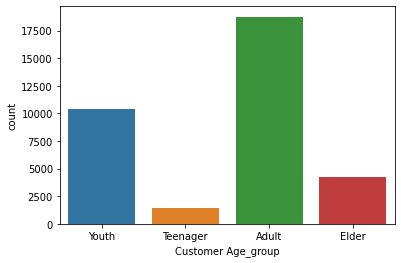

In [ ]:
sns.countplot(x=amazon['Customer Age_group'])

In [ ]:
sns.countplot(x=amazon['Product_Category'])

NameError: ignored